In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn    

plt.style.use('seaborn-dark-palette')
df = pd.read_csv("./selenium-firefox/final_01.csv",sep=',') #read from file

df.dropna(inplace=True)  #remove none values
 

In [2]:
#create a new column where the values are the length of the awards list

df['awards']=df['awards'].str.split(',')
df['awards_int'] = df['awards'].str.len()
df['awards_int'] = df['awards_int'].astype(int)
df['original_publish_year'] = df['original_publish_year'].astype(int)
df['num_pages'] = df['num_pages'].astype(int)
df.head(10)


,Unnamed: 0,url,title,author,num_reviews,num_ratings,avg_rating,num_pages,original_publish_year,series,genres,awards,places,awards_int
0,0,https://www.goodreads.com//book/show/13496.A_G...,A Game of Thrones,George R.R. Martin,55502,2084416,4.44,835,2005,True,"['Fantasy', 'Fiction', 'Fantasy']","[Nebula Award Nominee for Best Novel (1997), ...",The Lands of Ice and Fire,4
3,3,https://www.goodreads.com//book/show/7235533-t...,The Way of Kings,Brandon Sanderson,22153,334282,4.61,1007,2010,True,"['Fantasy', 'Fiction', 'Fantasy']",[Locus Award Nominee for Best Fantasy Novel (2...,Roshar,4
5,5,https://www.goodreads.com//book/show/228665.Th...,The Eye of the World,Robert Jordan,13670,412040,4.17,814,1990,True,"['Fantasy', 'Fiction', 'Fantasy']",[Locus Award Nominee for Best Fantasy Book (19...,Emond's Field,1
6,6,https://www.goodreads.com//book/show/68428.Mis...,Mistborn: The Final Empire,Brandon Sanderson,30642,437261,4.44,541,2006,True,"['Fantasy', 'Fiction', 'Fantasy']","[Tähtifantasia Award Nominee (2018), Prix Elb...",Luthadel,2
7,7,https://www.goodreads.com//book/show/18116.His...,His Dark Materials,Philip Pullman,5321,150053,4.25,1088,2003,True,"['Fantasy', 'Young Adult', 'Fiction']",[Literaturpreis der Jury der jungen Leser for ...,"Oxford, England",1
8,8,https://www.goodreads.com//book/show/113436.Er...,Eragon,Christopher Paolini,22885,1497065,3.91,503,2005,True,"['Fantasy', 'Young Adult', 'Fiction']",[Book Sense Book of the Year Award for Childre...,Alagaësia,5
9,9,https://www.goodreads.com//book/show/77197.Ass...,Assassin's Apprentice,Robin Hobb,10743,248939,4.15,435,1996,True,"['Fantasy', 'Fiction', 'Fantasy']","[Locus Award Nominee for Fantasy (1996), Brit...",Buckkeep,3
10,10,https://www.goodreads.com//book/show/29588376-...,The Lies of Locke Lamora,Scott Lynch,15655,240838,4.26,752,2006,True,"['Fantasy', 'Fiction', 'Adventure']",[Locus Award Nominee for Best Fantasy Novel an...,Camorr,5
14,14,https://www.goodreads.com//book/show/7332.The_...,The Silmarillion,J.R.R. Tolkien,8564,231275,3.93,386,2004,True,"['Fantasy', 'Fiction', 'Classics']","[Locus Award for Best Fantasy Novel (1978), D...",Middle-earth,3
18,18,https://www.goodreads.com//book/show/13642.A_W...,A Wizard of Earthsea,Ursula K. Le Guin,10403,256116,3.99,183,2004,True,"['Fantasy', 'Fiction', 'Young Adult']","[Lewis Carroll Shelf Award (1979), Boston Glo...",Earthsea Realm,4


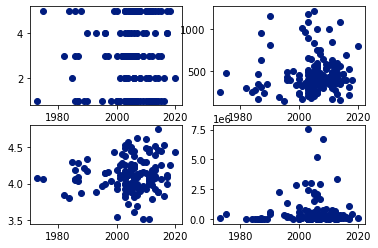

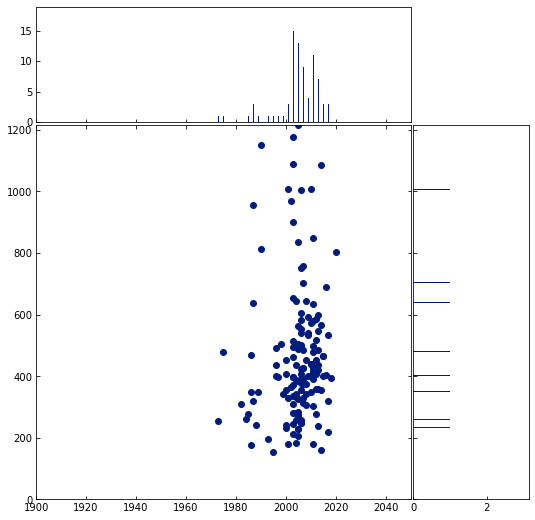

In [3]:
#for minmax_norm_rating we need to use 
df['minmax_norm_rating'] = 1.0 + (df['avg_rating']-df['avg_rating'].min())/(df['avg_rating'].max()-df['avg_rating'].min())*9.0

#for mean_norm_rating we need to use 
df['mean_norm_rating'] = 1.0 + (df['avg_rating']-df['avg_rating'].mean())/(df['avg_rating'].max()-df['avg_rating'].min())*9.0

#ratings_per_publication_year=pd.pivot_table(data=df, index='original_publish_year', values='minmax_norm_rating', aggfunc=np.mean)

#with this pivot table, you can see the minmax_norm_ratings grouped per year
# Group the books by original_publish_year and get the mean of the minmax_norm_ratings of the groups
#ratings_per_publication_year.plot()

#boxplot = df.boxplot(column=['awards_int'])
x=df['original_publish_year']

fig, axes = plt.subplots(2, 2)
axes[0, 0].scatter(x, df['awards_int'])
axes[0, 1].scatter(x, df['num_pages'])
axes[1, 0].scatter(x, df['avg_rating'])
axes[1, 1].scatter(x, df['num_ratings'])
plt.show()


# definitions for the axes
left, width = 0.1, 0.65
bottom, height = 0.1, 0.65
spacing = 0.005


rect_scatter = [left, bottom, width, height]
rect_histx = [left, bottom + height + spacing, width, 0.2]
rect_histy = [left + width + spacing, bottom, 0.2, height]
# start with a rectangular Figure
plt.figure(figsize=(8, 8))

ax_scatter = plt.axes(rect_scatter)
ax_scatter.tick_params(direction='in', top=True, right=True)
ax_histx = plt.axes(rect_histx)
ax_histx.tick_params(direction='in', labelbottom=False)
ax_histy = plt.axes(rect_histy)
ax_histy.tick_params(direction='in', labelleft=False)

# the scatter plot:
ax_scatter.scatter(x, df['num_pages'])

# now determine nice limits by hand:
binwidth = 0.25

ax_scatter.set_xlim((1900, 2050))
ax_scatter.set_ylim((0, df['num_pages'].max()))

binsx = np.arange(1900, 2050 + binwidth, binwidth)
binsy = np.arange(0, df['num_pages'].max() + binwidth, binwidth)
ax_histx.hist(x, bins=binsx)
ax_histy.hist(df['num_pages'], bins=binsy, orientation='horizontal')

ax_histx.set_xlim(ax_scatter.get_xlim())
ax_histy.set_ylim(ax_scatter.get_ylim())

plt.show()

In [4]:
#Create a function that given an author as input it returns her/his book with the highest minmax_norm_ratings.

#def max_minmaxrating_book(person):
#    ratings_per_author
#    selectedType = df[df["author"] == person]
#    selectedTypeAndYear = selectedType.loc[selectedType["Year"] == selectedType["Year"].max(),:]
#maxValue = selectedTypeAndYear["Number"].max()
#    return ratings_per_author

#print("The minmaxrating ")
    